# TODO Needs Comments


In [1]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

data = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h_Normalised_per_Timepoint.csv")
data

Run  Plate   ID  048h_raw_BF_AreaShape_area  \
0    RR      1   A1                    0.754091   
1    RR      1   A2                   -0.783470   
2    RR      1   A3                    1.636441   
3    RR      1   A4                   -0.525754   
4    RR      1   A5                    0.537872   
..   ..    ...  ...                         ...   
762  TR      2   H8                   -0.342295   
763  TR      2   H9                   -0.925432   
764  TR      2  H10                   -1.873304   
765  TR      2  H11                   -2.408392   
766  TR      2  H12                   -1.204989   

     048h_raw_BF_AreaShape_aspect_ratio  \
0                             -0.889636   
1                             -1.252670   
2                             -0.184192   
3                             -0.513477   
4                             -0.248943   
..                                  ...   
762                           -0.103644   
763                            1.281638   
764                           -1.279234   
765                           -0.915375   
766                           -1.054547   

     048h_raw_BF_AreaShape_axis_major_length  \
0                                   0.132588   
1                                  -1.238409   
2                                   1.186196   
3                                  -0.672134   
4                                   0.294790   
..                                       ...   
762                                -0.319022   
763                                -0.116354   
764                                -2.131125   
765                                -2.411391   
766                                -1.484010   

     048h_raw_BF_AreaShape_axis_minor_length  \
0                                   1.204628   
1                                   0.003129   
2                                   1.565451   
3                                  -0.202863   
4                                   0.612413   
..                                       ...   
762                                -0.266071   
763                                -1.536867   
764                                -1.049808   
765                                -1.803167   
766                                -0.531492   

     048h_raw_BF_AreaShape_eccentricity  \
0                             -1.000051   
1                             -1.752936   
2                             -0.008740   
3                             -0.422446   
4                             -0.084969   
..                                  ...   
762                            0.083062   
763                            1.304509   
764                           -1.821515   
765                           -1.045366   
766                           -1.308189   

     048h_raw_BF_AreaShape_feret_diameter_max  \
0                                    0.007074   
1                                   -1.131530   
2                                    1.127225   
3                                   -0.849309   
4                                    0.059492   
..                                        ...   
762                                 -0.511010   
763                                 -0.330223   
764                                 -2.016265   
765                                 -2.414625   
766                                 -1.523914   

     048h_raw_BF_AreaShape_perimeter  ...  096h_str_BF_AreaShape_moments_hu_1  \
0                           0.615519  ...                           -0.769984   
1                          -0.724230  ...                           -0.587974   
2                           1.795347  ...                           -0.724302   
3                          -0.402853  ...                            0.276192   
4                           0.498737  ...                            0.544892   
..                               ...  ...                                 ...   
762                        -0.233997  ...      

In [2]:
annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

data_annotated = data.set_index(["Run","Plate","ID"]).merge(no_na_annot,on=["Run","Plate","ID"])
data_annotated

Run  Plate   ID  048h_raw_BF_AreaShape_area  \
0    RR      1   A1                    0.754091   
1    RR      1   A2                   -0.783470   
2    RR      1   A3                    1.636441   
3    RR      1   A4                   -0.525754   
4    RR      1   A5                    0.537872   
..   ..    ...  ...                         ...   
433  TR      2   H8                   -0.342295   
434  TR      2   H9                   -0.925432   
435  TR      2  H10                   -1.873304   
436  TR      2  H11                   -2.408392   
437  TR      2  H12                   -1.204989   

     048h_raw_BF_AreaShape_aspect_ratio  \
0                             -0.889636   
1                             -1.252670   
2                             -0.184192   
3                             -0.513477   
4                             -0.248943   
..                                  ...   
433                           -0.103644   
434                            1.281638   
435                           -1.279234   
436                           -0.915375   
437                           -1.054547   

     048h_raw_BF_AreaShape_axis_major_length  \
0                                   0.132588   
1                                  -1.238409   
2                                   1.186196   
3                                  -0.672134   
4                                   0.294790   
..                                       ...   
433                                -0.319022   
434                                -0.116354   
435                                -2.131125   
436                                -2.411391   
437                                -1.484010   

     048h_raw_BF_AreaShape_axis_minor_length  \
0                                   1.204628   
1                                   0.003129   
2                                   1.565451   
3                                  -0.202863   
4                                   0.612413   
..                                       ...   
433                                -0.266071   
434                                -1.536867   
435                                -1.049808   
436                                -1.803167   
437                                -0.531492   

     048h_raw_BF_AreaShape_eccentricity  \
0                             -1.000051   
1                             -1.752936   
2                             -0.008740   
3                             -0.422446   
4                             -0.084969   
..                                  ...   
433                            0.083062   
434                            1.304509   
435                           -1.821515   
436                           -1.045366   
437                           -1.308189   

     048h_raw_BF_AreaShape_feret_diameter_max  \
0                                    0.007074   
1                                   -1.131530   
2                                    1.127225   
3                                   -0.849309   
4                                    0.059492   
..                                        ...   
433                                 -0.511010   
434                                 -0.330223   
435                                 -2.016265   
436                                 -2.414625   
437                                 -1.523914   

     048h_raw_BF_AreaShape_perimeter  ...  096h_str_BF_AreaShape_moments_hu_4  \
0                           0.615519  ...                           -0.081040   
1                          -0.724230  ...                           -0.080919   
2                           1.795347  ...                           -0.081045   
3                          -0.402853  ...                           -0.073034   
4                           0.498737  ...                           -0.081127   
..                               ...  ...                                 ...   
433                        -0.233997  ...      

In [3]:
#data_annotated.keys().to_numpy()

In [4]:
dat_axes = data_annotated[data_annotated["Axes"] != "unclassified"]
dat_axes = dat_axes[dat_axes ['048h_raw_BF_AreaShape_area'].notna()].dropna(axis=1).dropna()
dat_axes = dat_axes.drop([key for key in dat_axes.keys() if any([term in key for term in ["Location","orientation","_X","_Y","UMAP","PC","096h"]])],axis=1)
dat_axes

Run  Plate   ID  048h_raw_BF_AreaShape_area  \
0    RR      1   A1                    0.754091   
1    RR      1   A2                   -0.783470   
2    RR      1   A3                    1.636441   
3    RR      1   A4                   -0.525754   
4    RR      1   A5                    0.537872   
..   ..    ...  ...                         ...   
431  TR      2   H6                   -0.425288   
434  TR      2   H9                   -0.925432   
435  TR      2  H10                   -1.873304   
436  TR      2  H11                   -2.408392   
437  TR      2  H12                   -1.204989   

     048h_raw_BF_AreaShape_aspect_ratio  \
0                             -0.889636   
1                             -1.252670   
2                             -0.184192   
3                             -0.513477   
4                             -0.248943   
..                                  ...   
431                           -0.307064   
434                            1.281638   
435                           -1.279234   
436                           -0.915375   
437                           -1.054547   

     048h_raw_BF_AreaShape_axis_major_length  \
0                                   0.132588   
1                                  -1.238409   
2                                   1.186196   
3                                  -0.672134   
4                                   0.294790   
..                                       ...   
431                                -0.483649   
434                                -0.116354   
435                                -2.131125   
436                                -2.411391   
437                                -1.484010   

     048h_raw_BF_AreaShape_axis_minor_length  \
0                                   1.204628   
1                                   0.003129   
2                                   1.565451   
3                                  -0.202863   
4                                   0.612413   
..                                       ...   
431                                -0.222631   
434                                -1.536867   
435                                -1.049808   
436                                -1.803167   
437                                -0.531492   

     048h_raw_BF_AreaShape_eccentricity  \
0                             -1.000051   
1                             -1.752936   
2                             -0.008740   
3                             -0.422446   
4                             -0.084969   
..                                  ...   
431                           -0.155368   
434                            1.304509   
435                           -1.821515   
436                           -1.045366   
437                           -1.308189   

     048h_raw_BF_AreaShape_feret_diameter_max  \
0                                    0.007074   
1                                   -1.131530   
2                                    1.127225   
3                                   -0.849309   
4                                    0.059492   
..                                        ...   
431                                 -0.286443   
434                                 -0.330223   
435                                 -2.016265   
436                                 -2.414625   
437                                 -1.523914   

     048h_raw_BF_AreaShape_perimeter  ...  072h_str_BF_AreaShape_moments_hu_3  \
0                           0.615519  ...                           -0.090511   
1                          -0.724230  ...                            0.041954   
2                           1.795347  ...                            0.187342   
3                          -0.402853  ...                           -0.251460   
4                           0.498737  ...                            2.862632   
..                               ...  ...                                 ...   
431                        -0.402853  ...      

In [5]:
counts = dat_axes.groupby("Axes")["Run"].count()
print(counts)

Axes
double    136
single    256
Name: Run, dtype: int64


In [6]:
gt_keys = ["Run","Plate","ID","Axes","Morph","Morph_Class"]
X = dat_axes.drop(gt_keys,axis=1).rename(columns = name_mapping)
Y = pd.get_dummies(dat_axes["Axes"])["single"]
Y

0       True
1       True
2       True
3       True
4       True
       ...  
431    False
434     True
435    False
436     True
437    False
Name: single, Length: 392, dtype: bool

In [7]:
# import PLSRegression from scikitlearn
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
# fit the pls regression
my_plsr = PLSRegression(n_components=2, scale=False)
my_plsr.fit(StandardScaler().fit_transform(X), Y)

PLSRegression(scale=False)

In [8]:
# extract scores (one score per individual per component)
scores_df = pd.DataFrame(my_plsr.x_scores_)

# standardize scores between -1 and 1 so they fit on the plot
std_scores_dim1 = 2 * ( (scores_df[0] - min(scores_df[0])) / (max(scores_df[0]) - min(scores_df[0])) ) -1
std_scores_dim2 = 2 * ( (scores_df[1] - min(scores_df[1])) / (max(scores_df[1]) - min(scores_df[1])) ) -1



In [9]:
from matplotlib.colors import ListedColormap
cmap_hex = np.load("custom_colormap(blur,orange,red,ice).npy")
cmap = sns.palettes.color_palette(cmap_hex[2:])
cmap

[(0.7294117647058823, 0.19607843137254902, 0.4),
 (0.06666666666666667, 0.7490196078431373, 0.6235294117647059)]

meta NOT subset; don't know how to subset; dropped


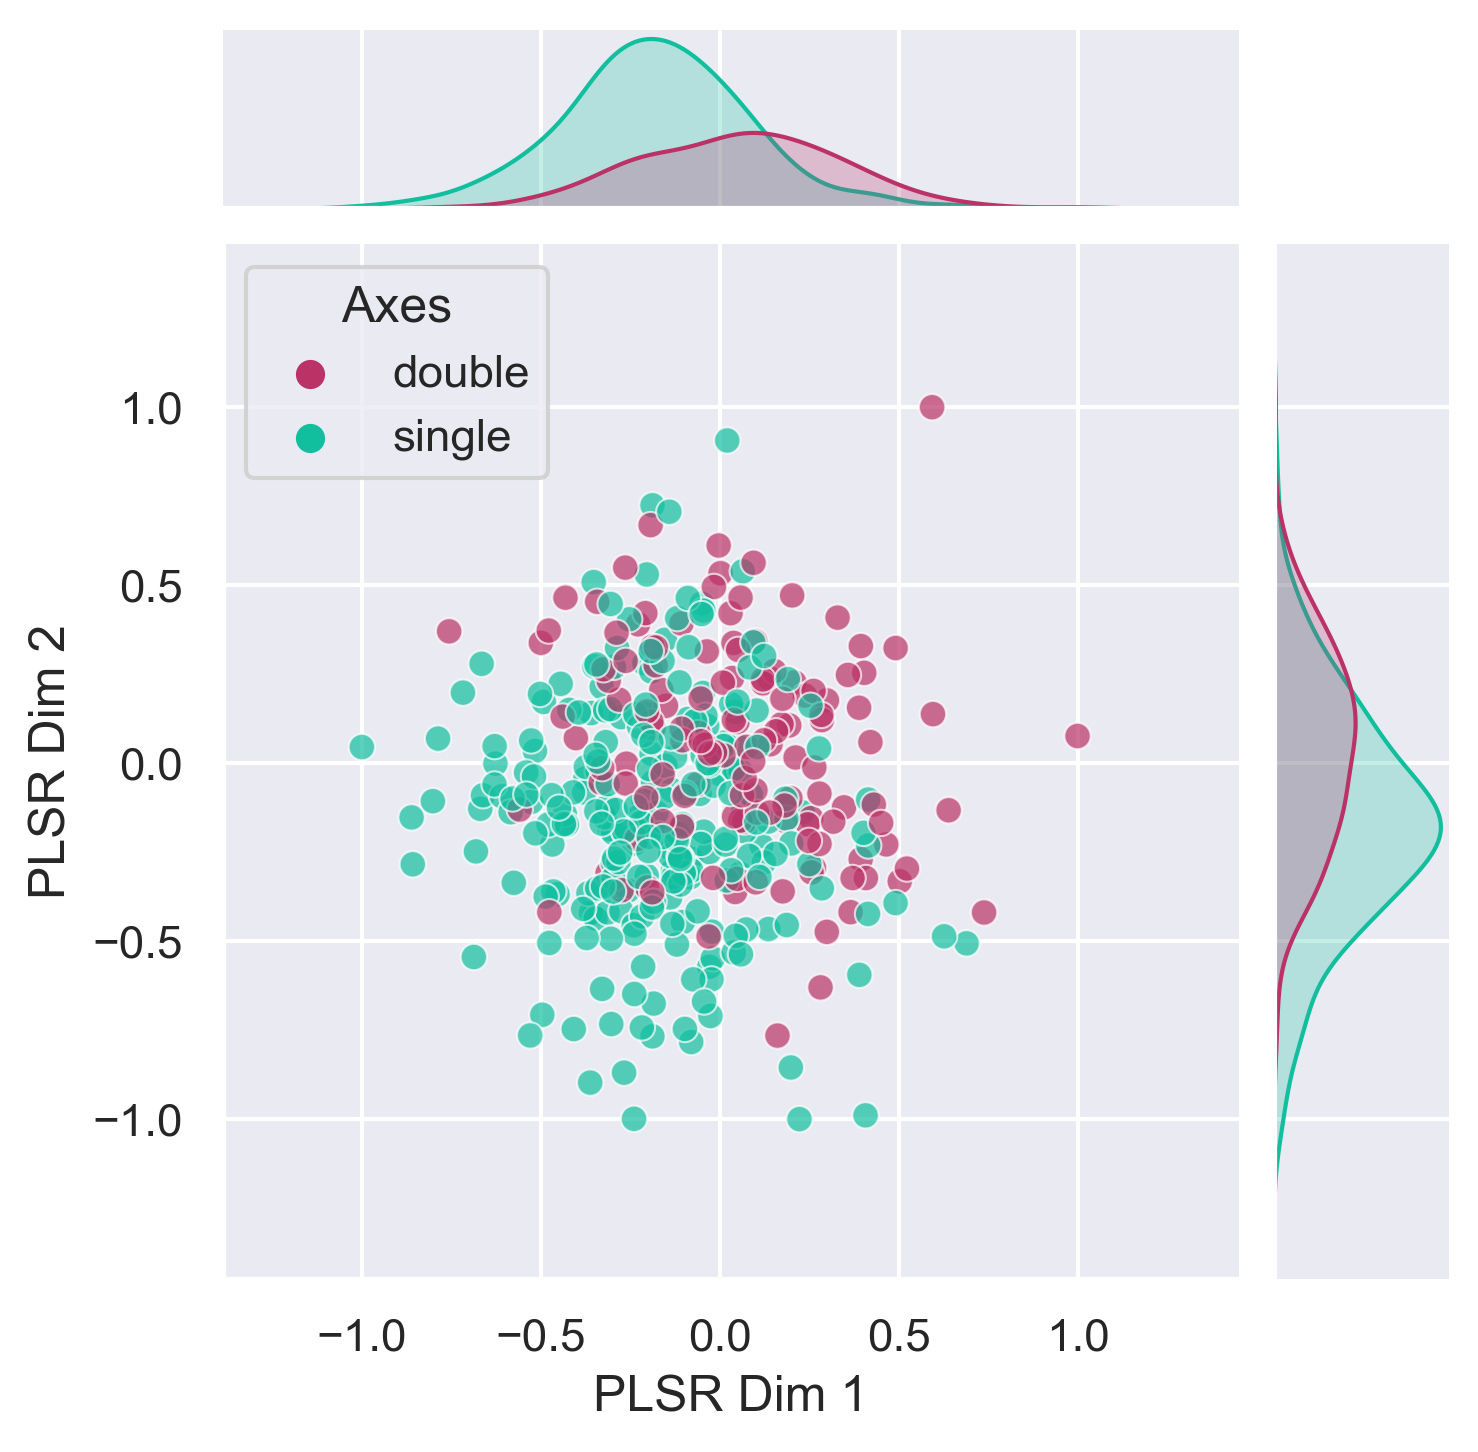

In [10]:
# create the biplot by plotting each data point individualle (one by one)
import matplotlib as mpl
import seaborn as sns

out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"

sns.set()

df_components = pd.DataFrame(
    {
        "Single":Y.to_numpy().astype(bool),
        "Axes":dat_axes["Axes"].to_numpy(),
        "Run":dat_axes["Run"].to_numpy(),
        "PLSR Dim 1":std_scores_dim1,
        "PLSR Dim 2":std_scores_dim2,
    }
)

sns.jointplot(df_components,x="PLSR Dim 1",y="PLSR Dim 2",hue="Axes", **{"alpha":0.7,"s":40},height=5,hue_order=["double","single"],palette=cmap,)
plt.savefig(f"{out_PLSR}/PLSR Axes components early features.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
#extract loadings (one loading per variable per component)
loadings_df = pd.DataFrame(my_plsr.x_loadings_,index=X.columns,columns=["PLSR Dim 1","PLSR Dim 2"])
print(np.min(loadings_df),np.max(loadings_df))

-0.270510024792432 0.25455941865569653


# Main Contributors (0.05 and 0.95 percentile)

meta NOT subset; don't know how to subset; dropped


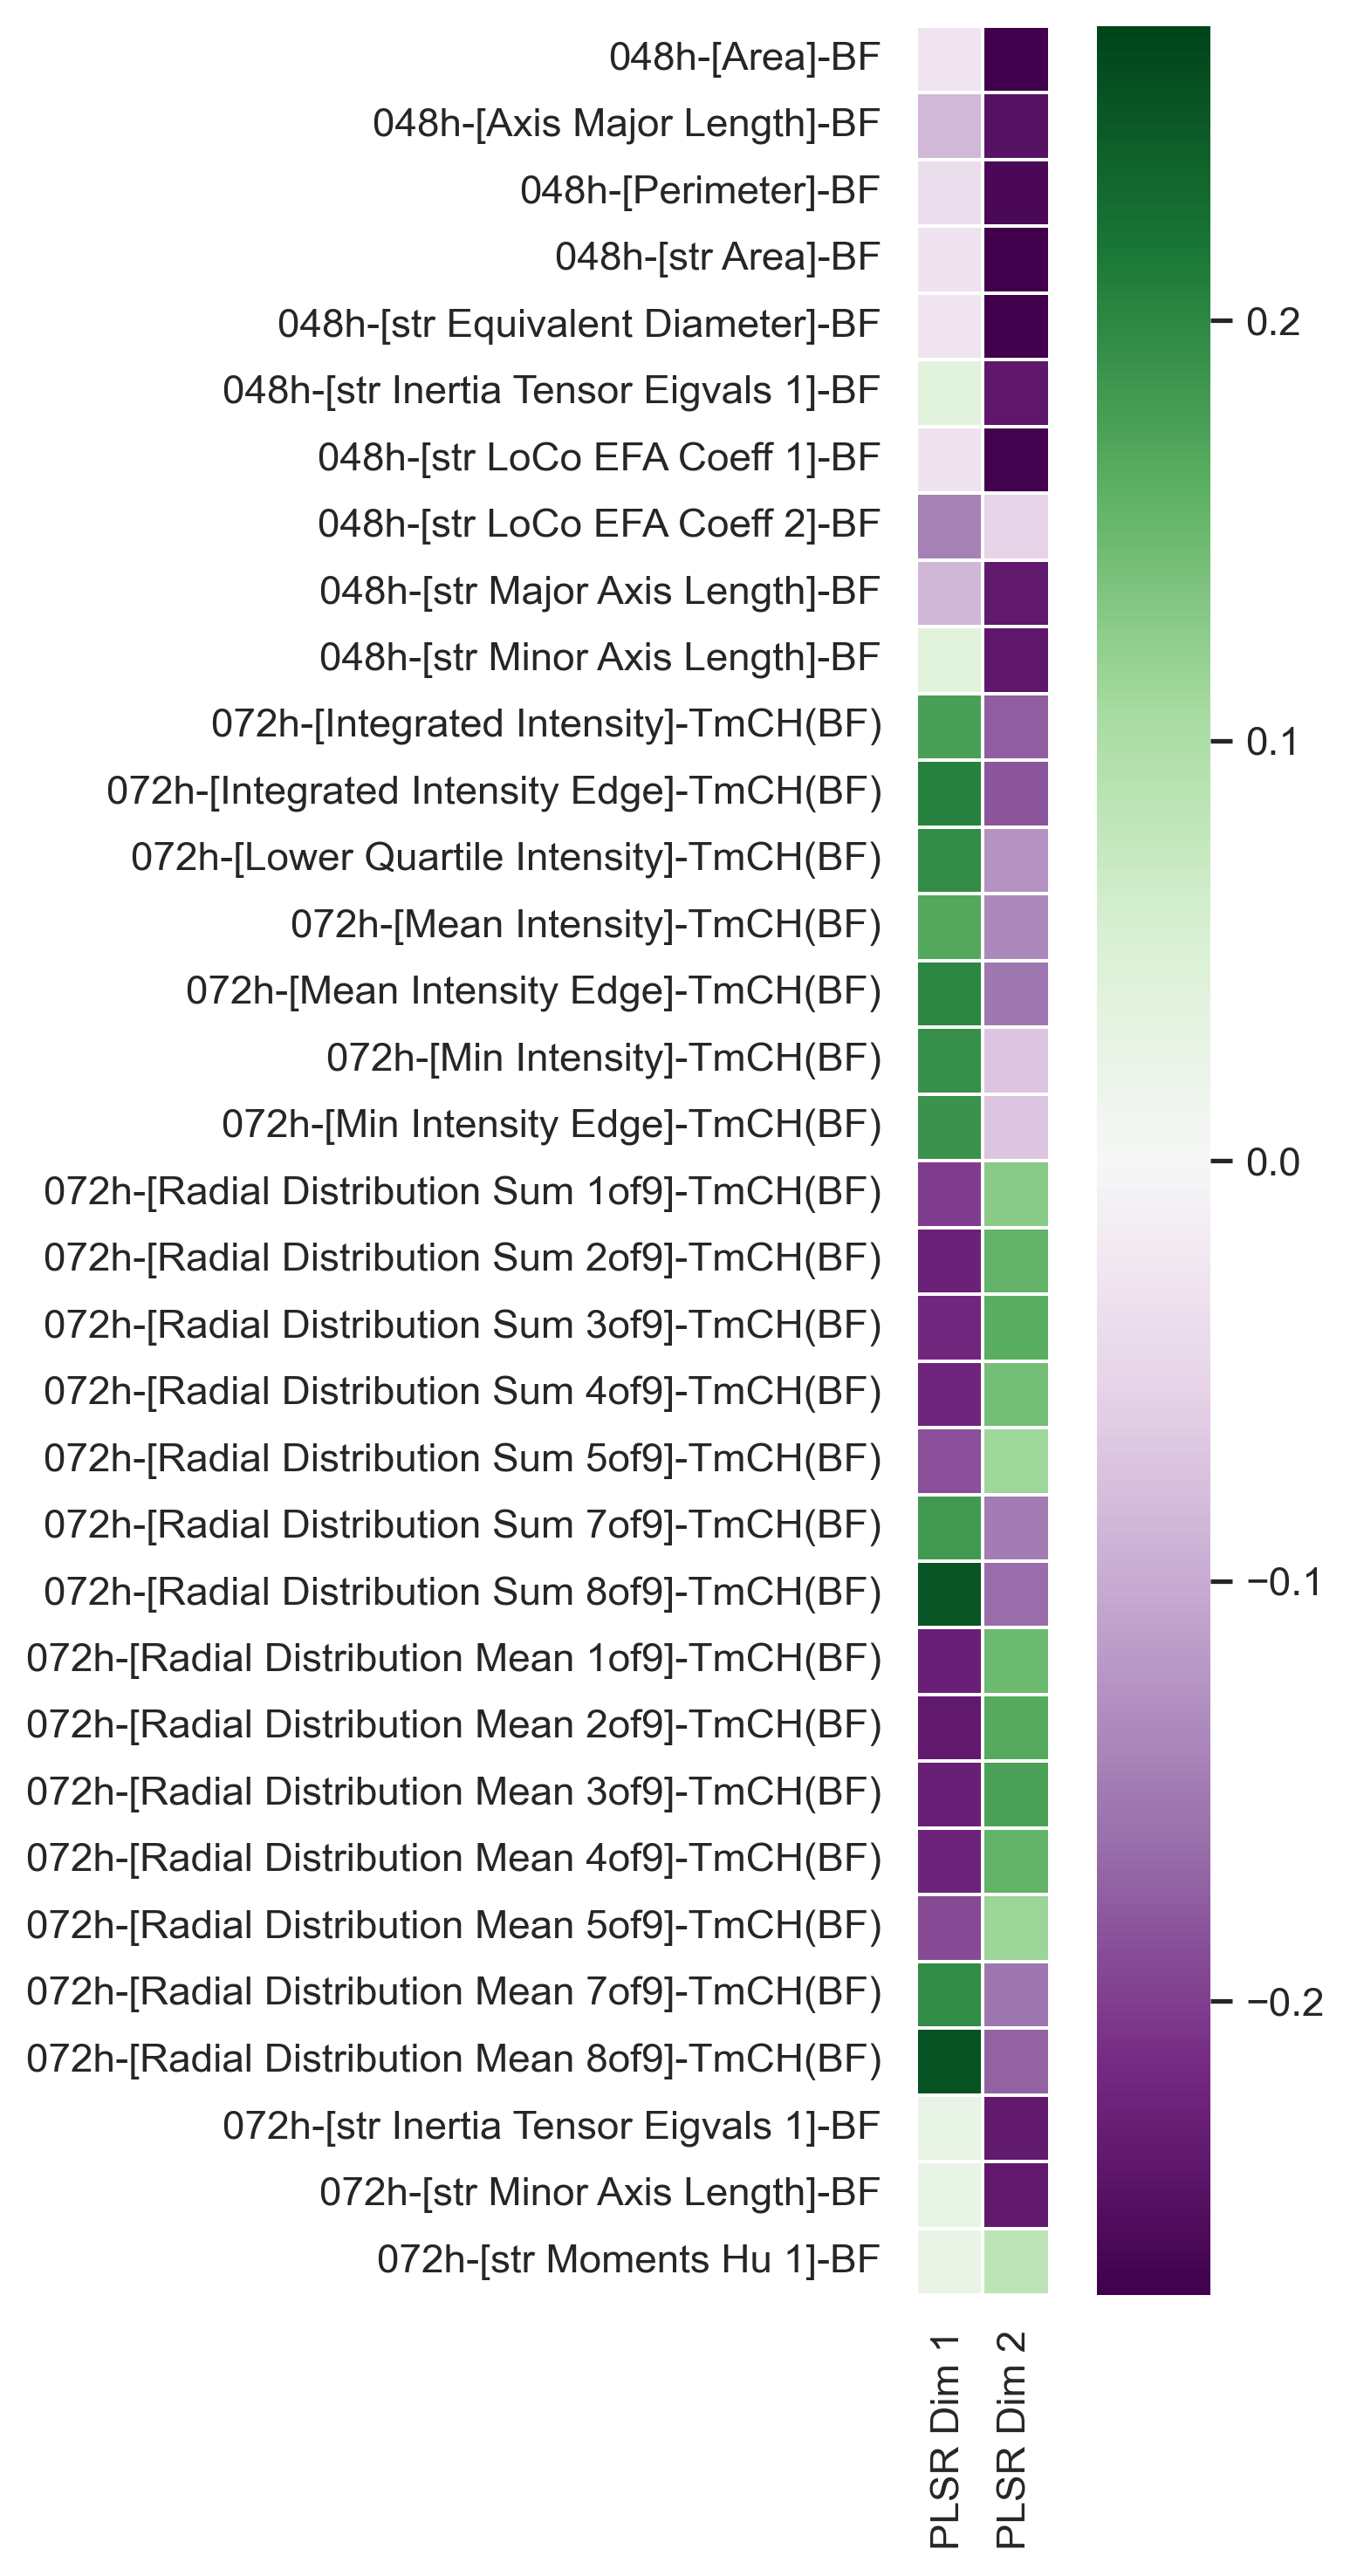

In [17]:
quantiles_upper = np.quantile(loadings_df,0.95,axis=0)
quantiles_lower = np.quantile(loadings_df,0.05,axis=0)
main_contributers = [
    key for key in loadings_df.index if (
        loadings_df.loc[key][0]>=quantiles_upper[0] or 
        loadings_df.loc[key][1]>=quantiles_upper[1] or 
        loadings_df.loc[key][0]<=quantiles_lower[0] or 
        loadings_df.loc[key][1]<=quantiles_lower[1]
    )
]

fig,ax = plt.subplots(1,1,figsize = (5,10))

sns.heatmap(loadings_df.loc[main_contributers], cmap = "PRGn",vmin=-0.27, vmax=0.27, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig(f"{out_PLSR}/PLSR Axes early features loadings 0.05 quantile.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
main_contributers_morph = ['048h-[Area]-BF',
 '048h-[Axis Major Length]-BF',
 '048h-[Feret Diameter Max]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 1 1]-BF',
 '048h-[str Inertia Tensor Eigvals 0]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str Major Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Perimeter]-BF',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[Max Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Min Intensity]-TmCH(BF)',
 '072h-[Min Intensity Edge]-TmCH(BF)',
 '072h-[Std Intensity]-TmCH(BF)',
 '072h-[Upper Quartile Intensity]-TmCH(BF)',
 '072h-[Radial Distribution Sum 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 4of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 5of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 9of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 4of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 5of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 9of9]-TmCH(BF)',
 '072h-[Radial Distribution Radial CV 6of9]-TmCH(BF)',
 '072h-[str Area]-BF',
 '072h-[str Equivalent Diameter]-BF',
 '072h-[str Inertia Tensor Eigvals 1]-BF',
 '072h-[str LoCo EFA Coeff 1]-BF',
 '072h-[str Perimeter]-BF']

axes_and_morph_contributers = sorted(list(set(main_contributers_morph).union(set(main_contributers))))
axes_and_morph_contributers

['048h-[Area]-BF',
 '048h-[Axis Major Length]-BF',
 '048h-[Feret Diameter Max]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 1 1]-BF',
 '048h-[str Inertia Tensor Eigvals 0]-BF',
 '048h-[str Inertia Tensor Eigvals 1]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str LoCo EFA Coeff 2]-BF',
 '048h-[str Major Axis Length]-BF',
 '048h-[str Minor Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[Max Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Min Intensity Edge]-TmCH(BF)',
 '072h-[Min Intensity]-TmCH(BF)',
 '072h-[Perimeter]-BF',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Di

In [19]:
loadings_df.loc[axes_and_morph_contributers].to_excel(r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Axes early features loadings 0.05 quantile.xlsx")

meta NOT subset; don't know how to subset; dropped


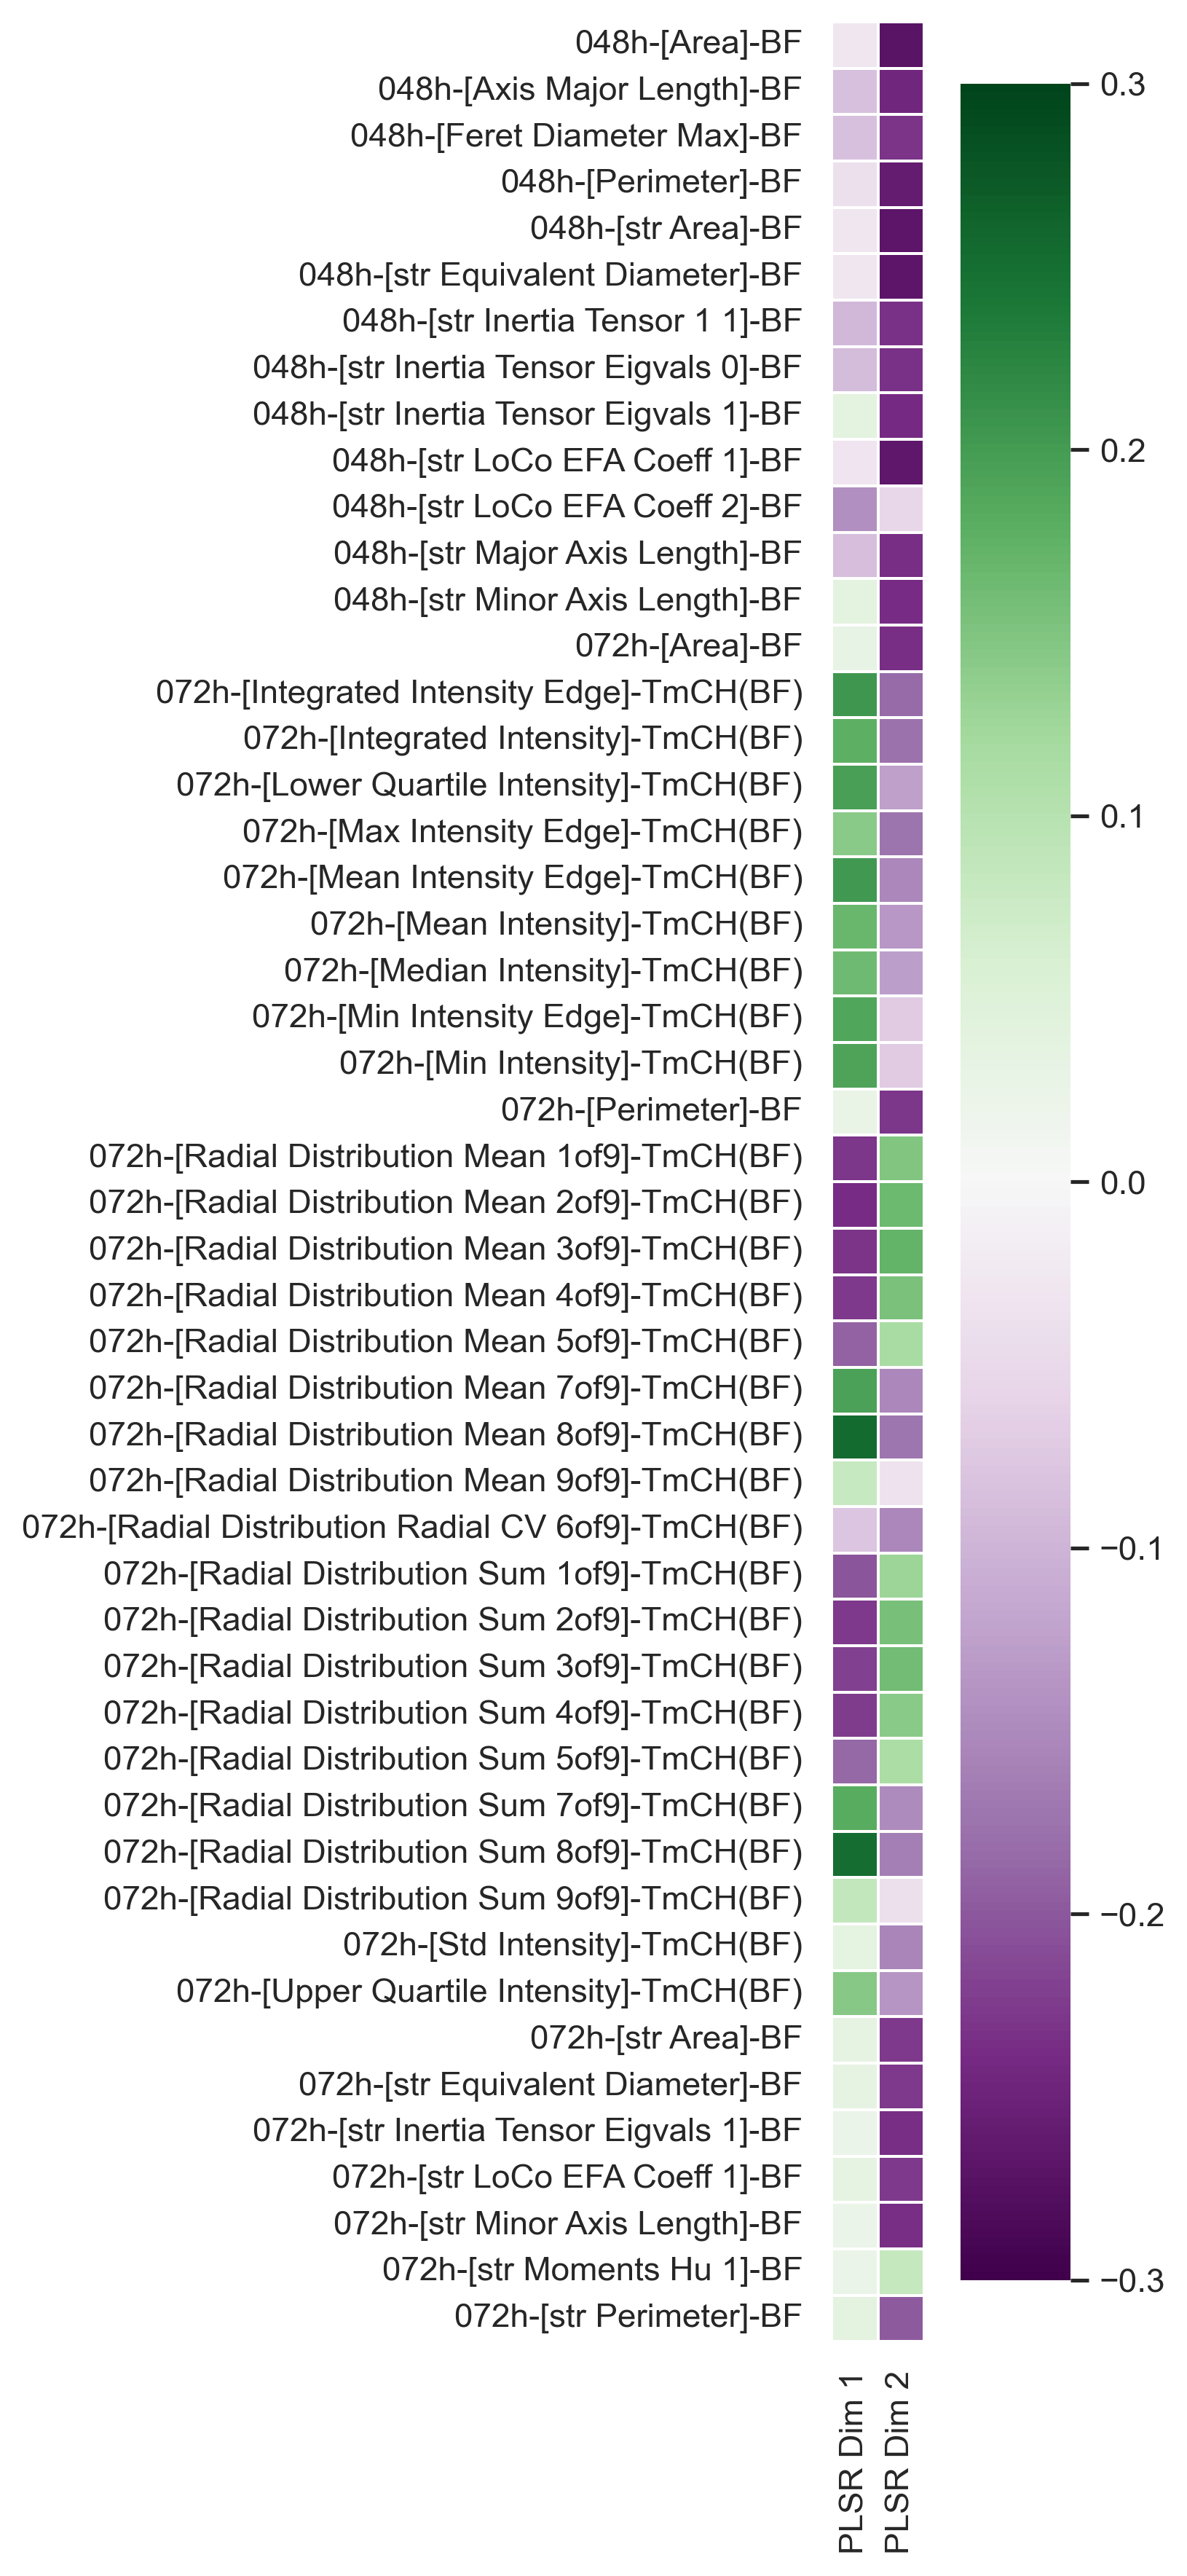

In [20]:
fig,ax = plt.subplots(1,1,figsize = (5,12))

sns.heatmap(loadings_df.loc[axes_and_morph_contributers], cmap = "PRGn",vmin=-0.3, vmax=0.3, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig(f"{out_PLSR}/PLSR Axes early features loadings 0.05 quantile axes and morph.pdf", format="pdf", bbox_inches="tight")
plt.show()

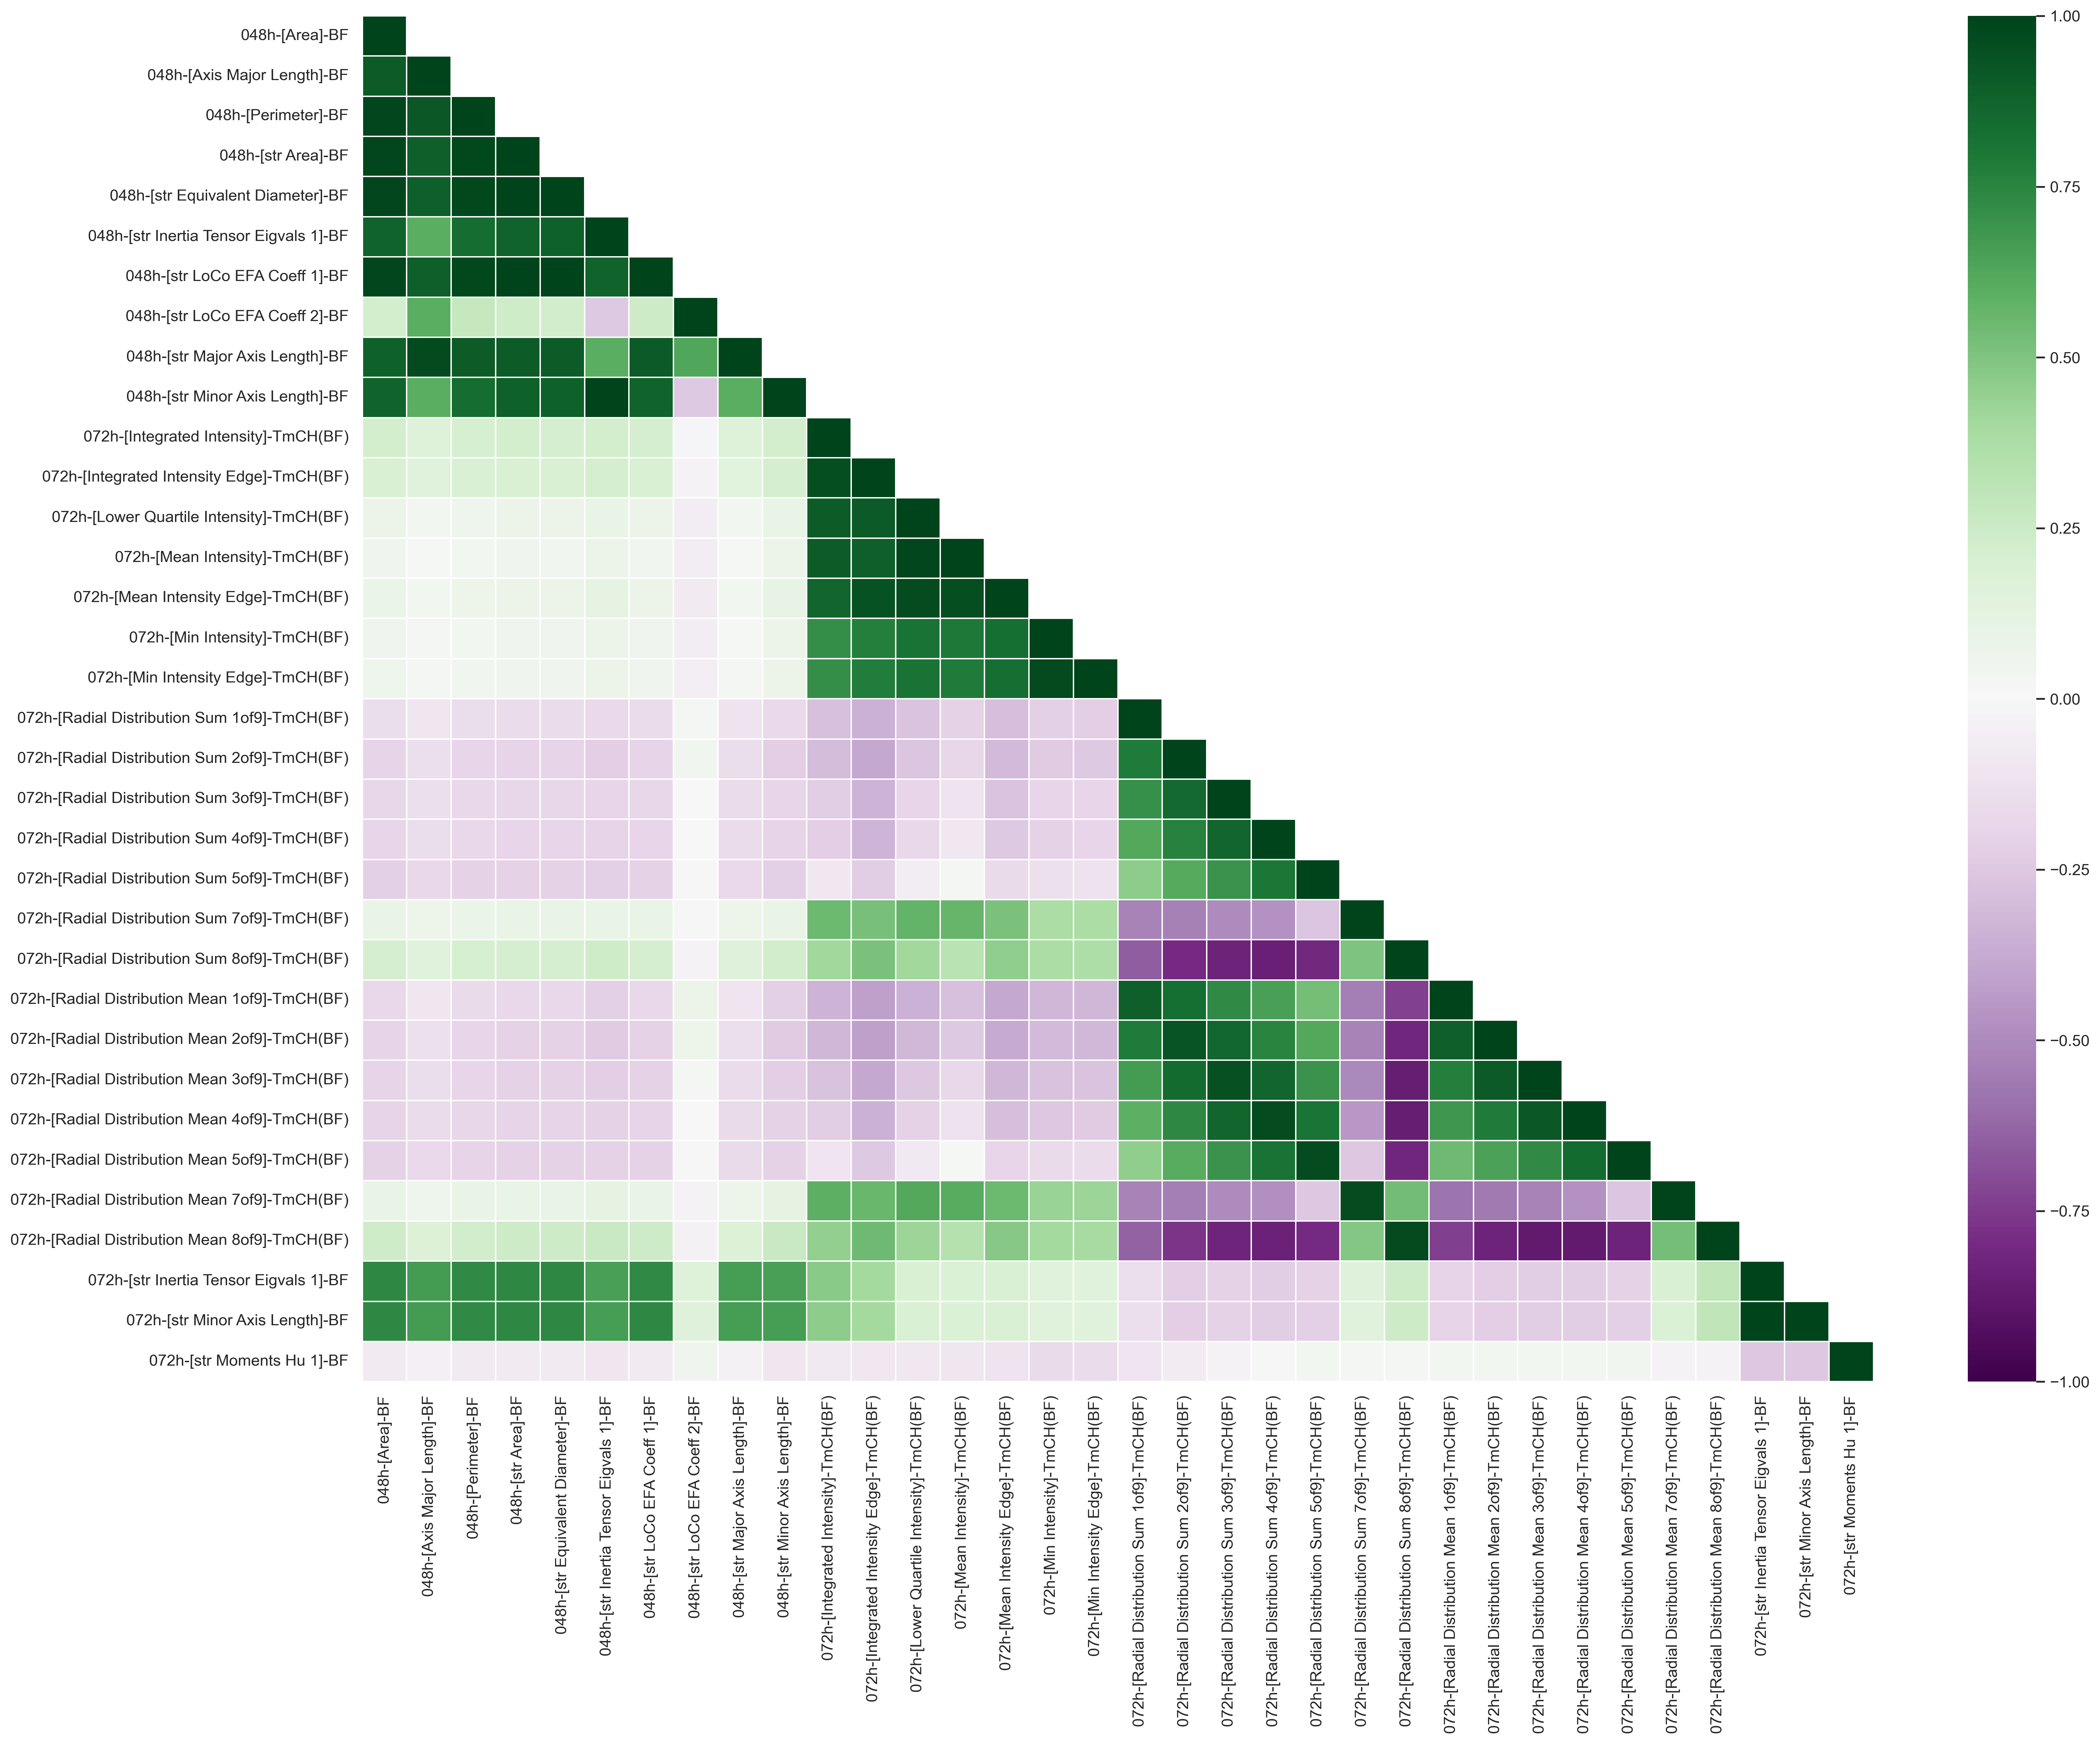

In [21]:
corr_analysis = X.rename(columns = name_mapping)[main_contributers].corr()
fig,ax = plt.subplots(1,1,figsize = (22,17))

mask = np.ones(corr_analysis.shape, dtype= bool)
mask = np.triu(mask, k = 1)

sns.heatmap(corr_analysis, cmap = "PRGn",vmin=-1, vmax=1, xticklabels='auto', yticklabels='auto', mask=mask, ax=ax,linewidths=0.5)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

# Main Contributors (0.01 and 0.99 percentile)

In [22]:
quantiles_upper = np.quantile(loadings_df,0.99,axis=0)
quantiles_lower = np.quantile(loadings_df,0.01,axis=0)
main_contributers = [
    key for key in loadings_df.index if (
        loadings_df.loc[key][0]>=quantiles_upper[0] or 
        loadings_df.loc[key][1]>=quantiles_upper[1] or 
        loadings_df.loc[key][0]<=quantiles_lower[0] or 
        loadings_df.loc[key][1]<=quantiles_lower[1]
    )
]
main_contributers

['048h-[Area]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 8of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 8of9]-TmCH(BF)']

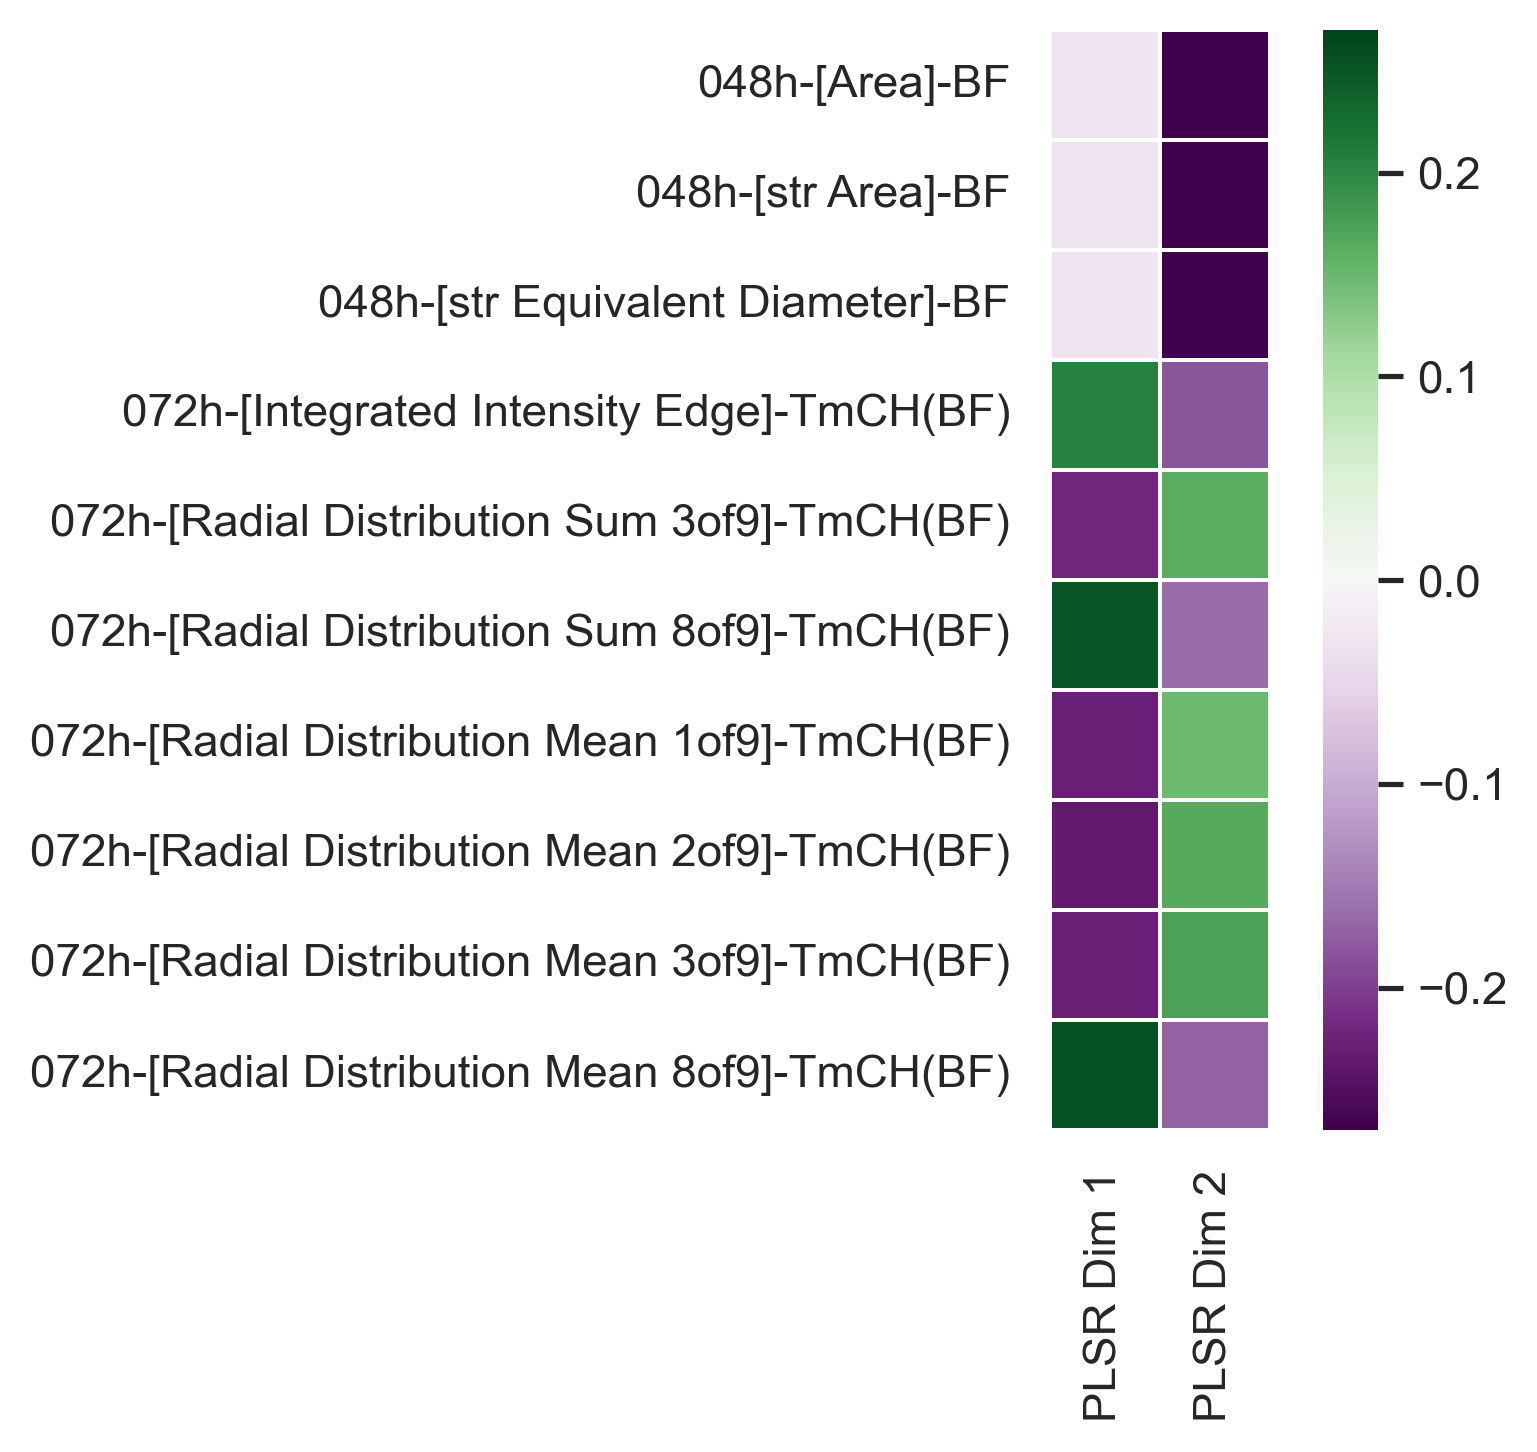

In [23]:


fig,ax = plt.subplots(1,1,figsize = (5,5))

sns.heatmap(loadings_df.loc[main_contributers], cmap = "PRGn",vmin=-0.27, vmax=0.27, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
#plt.savefig(f"{out_fig_2}/PLSR Axes loadings 0.01 quantile.pdf", format="pdf", bbox_inches="tight")
plt.show()

<Axes: xlabel='PC_1', ylabel='PC_2'>

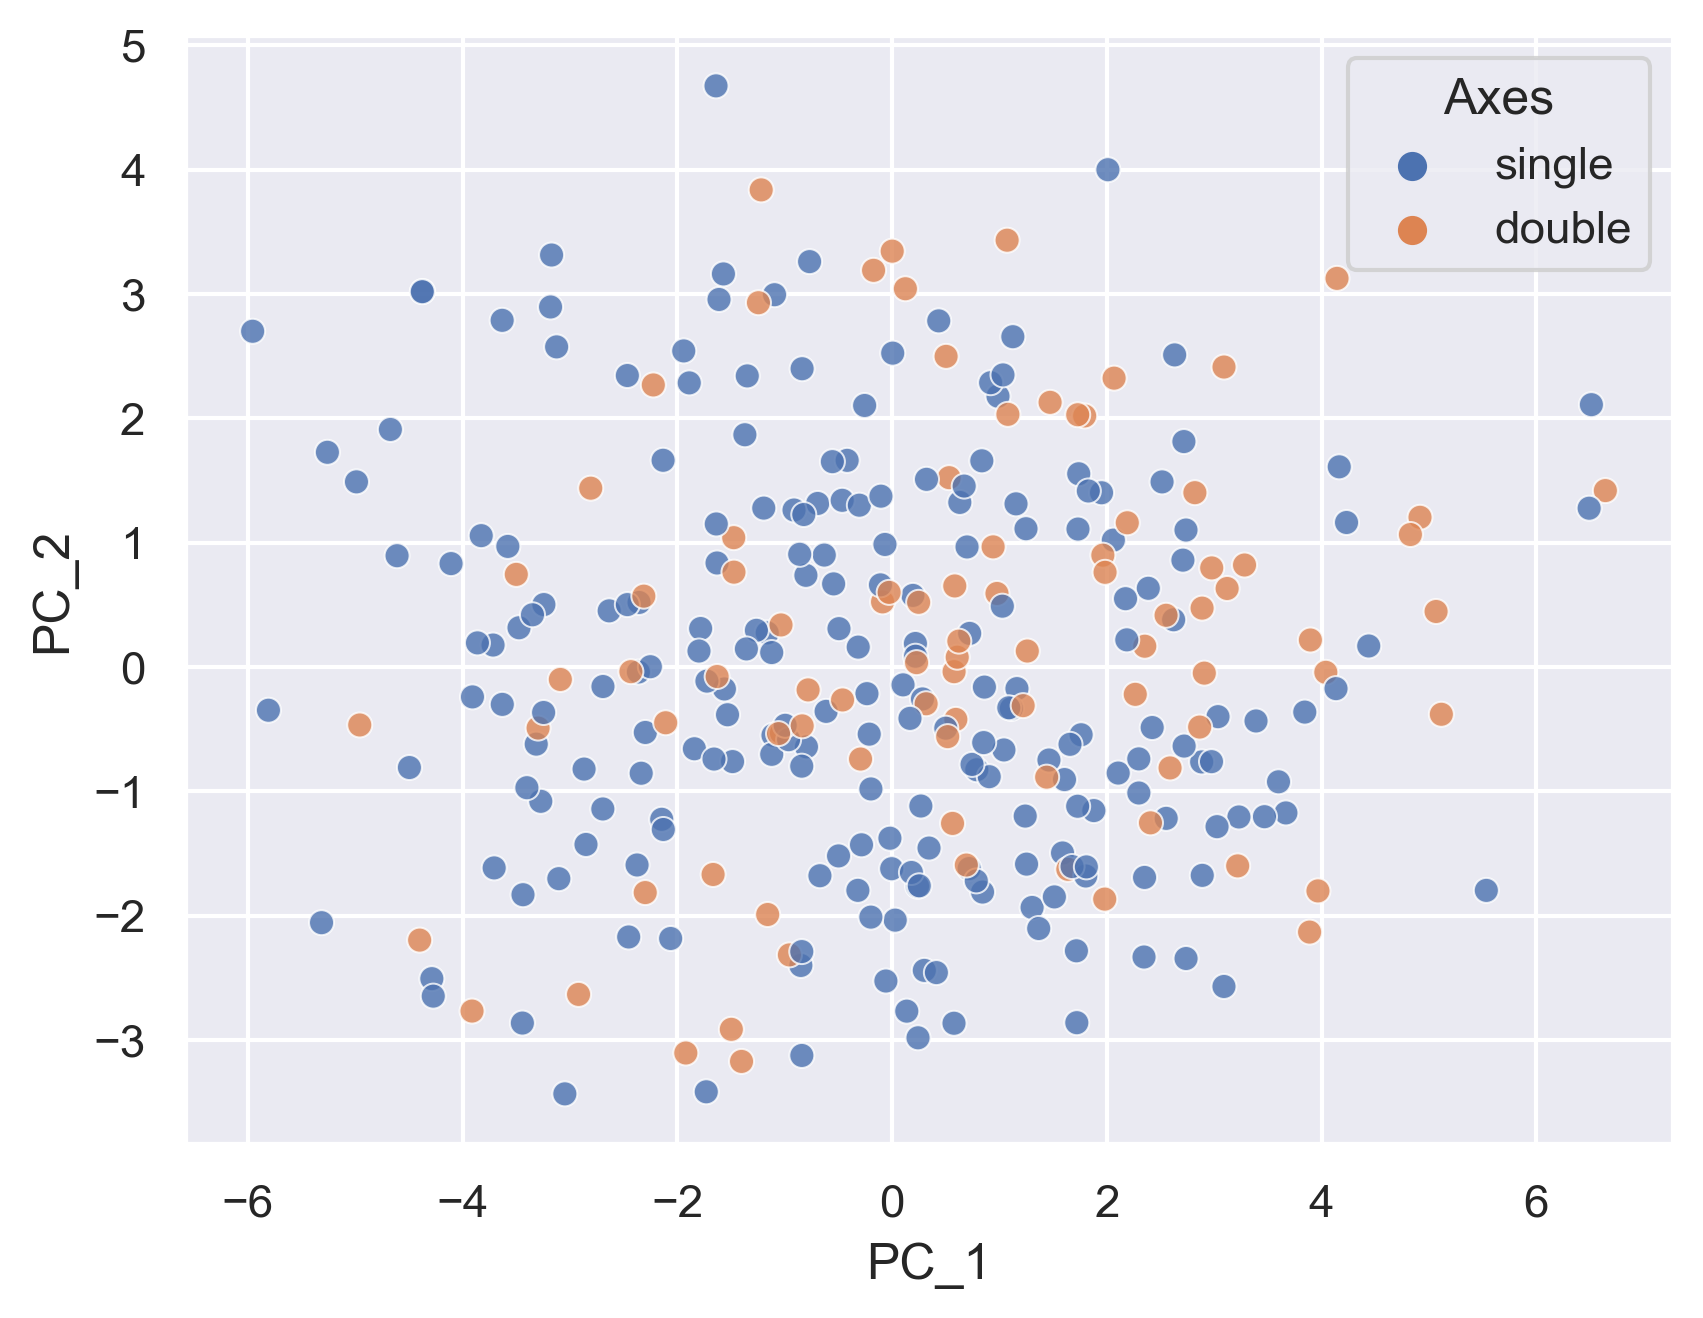

In [24]:
test_pca = opp.PCA_with_indices_and_ground_truth(X.rename(columns = name_mapping)[main_contributers],dat_axes[gt_keys],gt_keys,standardscale=True)
sns.scatterplot(test_pca,x="PC_1",y="PC_2",hue="Axes",**{"alpha":0.8})

In [25]:
from skimage import io
from skimage import color

masks_loc = home_directory + "/image_data/Processed Data/Masks Brightfield/72h"
btf_loc = home_directory + "/image_data/Processed Data/Focussed Images/72h/Brightfield"
bra_loc = home_directory + "/image_data/Processed Data/Focussed Images/72h/Brachyury"

mask_collection = io.imread_collection(masks_loc+"/*tif")
btf_collection = io.imread_collection(btf_loc+"/*tif")
bra_collection = io.imread_collection(bra_loc+"/*tif")

filenames = pd.concat([
    opp.extract_sample_identifiers(
        col.files,
        regex=r".*FK223_run_(?P<Run>[A-Z]+)_PLATE_(?P<Plate>[0-9]+)_ID_(?P<ID>[A-Z][0-9]+).*",
        return_original_name=True
    ).set_index(["Run","Plate","ID"]).drop("Filename",axis=1).rename(columns = {"Original Filename":f"{name}filename"}) 
    for name,col in zip(["mask_","btf_","bra_"],[mask_collection,btf_collection,bra_collection])
], axis = 1)

raw_data = pd.read_csv(table_location + "/All_Samples_Feature_Space_All_Features_48h,72h,96h.csv").set_index(["Run","Plate","ID"])
raw_data = raw_data[[key for key in raw_data.keys() if "072h" in key and "MeanFrac" in key and "bf_mask" in key]]
feats_w_filenames = pd.concat([filenames,raw_data.rename(columns={key:f"RAW_{key}" for key in raw_data.keys()}),dat_axes.set_index(["Run","Plate","ID"])],axis=1).dropna()


images = {
    "masks":[],
    "btf": [],
    "bra": [],
}

for i,row in feats_w_filenames.iterrows():
    images["masks"].append(io.imread(row["mask_filename"]))
    images["btf"].append(io.imread(row["btf_filename"]))
    images["bra"].append(io.imread(row["bra_filename"]))
    
for k,v in images.items():
    images[k] =  np.array(v)
    
cropped_images_btf = [opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,crop_height=200,crop_width=200) for img,mask in zip(images["btf"],images["masks"])]
cropped_images_bra = [opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,crop_height=200,crop_width=200) for img,mask in zip(images["bra"],images["masks"])]

def minmax(img):
    return (img-img.min())/img.max()


cropped_images_bra = np.array(cropped_images_bra)

composites = np.array([np.concatenate((minmax(crop_img),crop_bra/40),axis=1) for crop_img,crop_bra in zip(cropped_images_btf,cropped_images_bra)])

histogram_like_rows = []
for i,row in feats_w_filenames.iterrows():
    vals = row[[key for key in feats_w_filenames if key.startswith("RAW")]].to_numpy()

    histogram_like_rows.append(vals/vals.max())

def make_histogram_pic(values,width=400,height=200):
    step = int(width/9)
    columns = []
    for i in range(9):
        bar_height = int(175*values[i])
        bar_width = step
        if i == 8:
            bar_width = width - 8*step


        bar = np.full((bar_height,bar_width),1)
        blackspace = np.full((height-bar_height,bar_width),0)
        full_column = np.concatenate((blackspace,bar),axis=0)
        columns.append(full_column)

    return np.concatenate(columns,axis=1)

histogram_pics = np.array([make_histogram_pic(row) for row in histogram_like_rows])


composites_w_hist = np.array([np.concatenate((color.gray2rgb(comp),color.gray2rgb(hist)*[1,0.5,0]),axis=0) for comp,hist in zip(composites,histogram_pics)])
io.imshow(composites_w_hist[0])

In [ ]:
app = opp.get_dash_app_2D_scatter_hover_images(df_components,["PLSR Dim 1", "PLSR Dim 2"],hue="Axes",images=[(image*255).astype("uint8") for image in composites_w_hist])



if __name__ == "__main__":
    app.run(
    host='127.0.0.2',
    )

Dash is running on http://127.0.0.2:8050/

 * Serving Flask app 'organoid_prediction_python.data_visualisation._dash_plot_with_images'
 * Debug mode: off


 * Running on http://127.0.0.2:8050
Press CTRL+C to quit
